## Hclustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler


In [4]:
crime=pd.read_csv('crime_data.csv')
crime

,name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime= crime.drop(['name'], axis=1)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
trans= MinMaxScaler()
data=pd.DataFrame(trans.fit_transform(crime.iloc[:,:]))

In [7]:
data

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


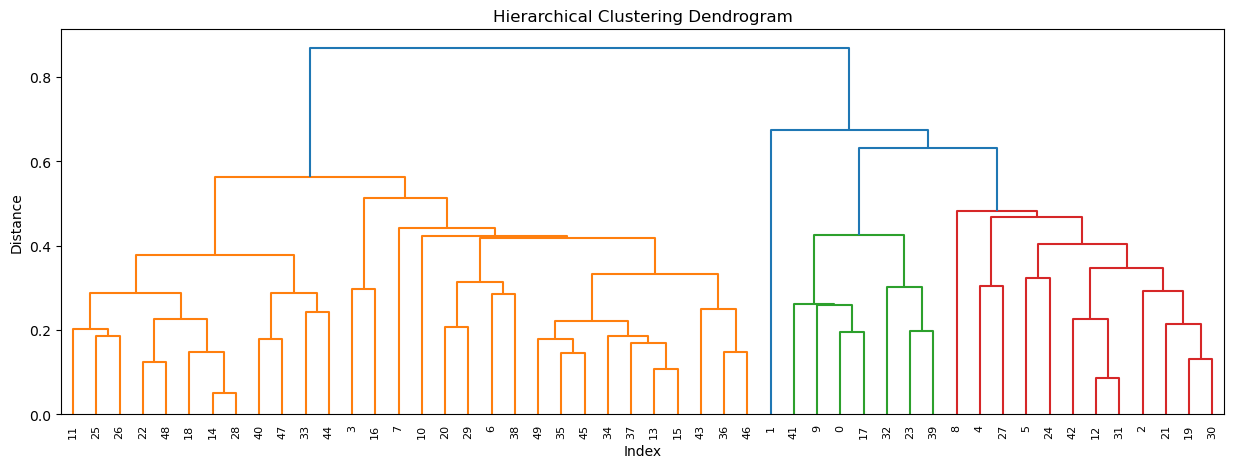

In [8]:
import scipy.cluster.hierarchy as sch
v=linkage(data, method='average', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(v)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean').fit(data)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']= cluster_labels
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [12]:
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.278947,254.842105,69.473684,28.357895
1,4.870000,114.433333,63.633333,15.943333
2,10.000000,263.000000,48.000000,44.500000


In [13]:
df=crime[(crime.clust==0)]
df

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
12,10.4,249,83,24.0,0
17,15.4,249,66,22.2,0
19,11.3,300,67,27.8,0
21,12.1,255,74,35.1,0


In [14]:
df=crime[(crime.clust==1)]
df

,Murder,Assault,UrbanPop,Rape,clust
3,8.8,190,50,19.5,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1


In [15]:
df=crime[(crime.clust==2)]

In [16]:
df

,Murder,Assault,UrbanPop,Rape,clust
1,10.0,263,48,44.5,2


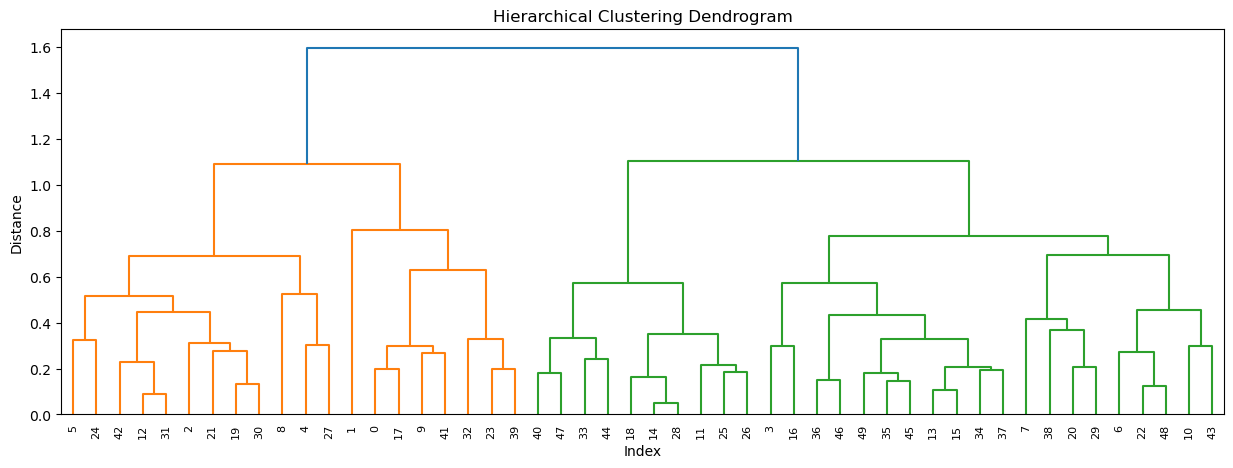

In [17]:
v=linkage(data, method='complete', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(v)
plt.show()

In [18]:
h_complete=AgglomerativeClustering(n_clusters=2, linkage='average', affinity='euclidean').fit(data)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']= cluster_labels
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [19]:
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.165,255.250000,68.400000,29.165000
1,4.870,114.433333,63.633333,15.943333


In [20]:
df=crime[(crime.clust==0)]
df

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
12,10.4,249,83,24.0,0
17,15.4,249,66,22.2,0
19,11.3,300,67,27.8,0


In [21]:
df=crime[(crime.clust==1)]
df

,Murder,Assault,UrbanPop,Rape,clust
3,8.8,190,50,19.5,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
10,5.3,46,83,20.2,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1


## Kmeans

In [22]:
crime1= pd.read_csv('crime_data.csv')

In [23]:
crime1=crime1.drop(['name'], axis=1)

In [24]:
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [25]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [27]:
df_norm = norm_func(crime1.iloc[:,:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


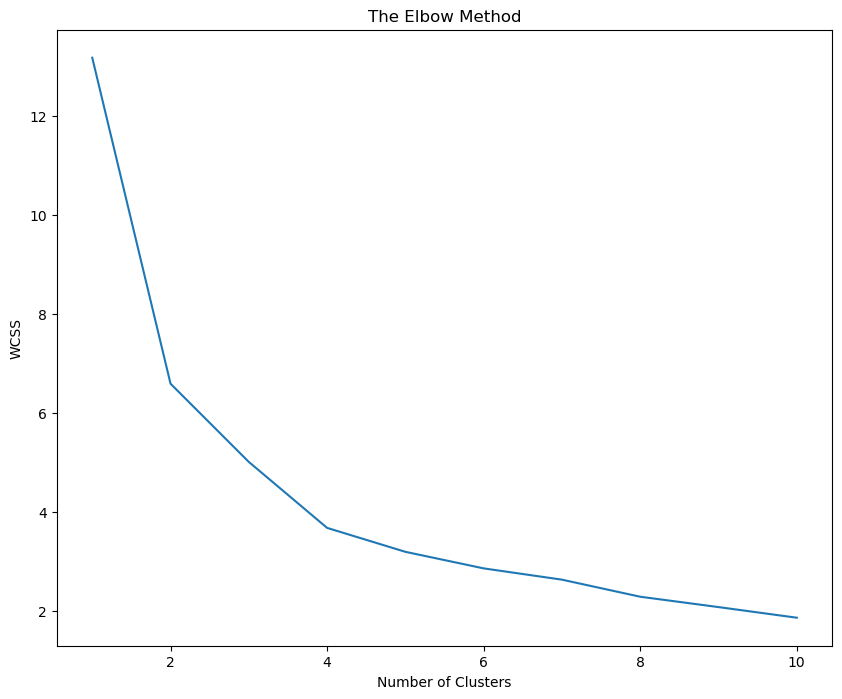

In [28]:
fig= plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()     

In [34]:
clf=KMeans(n_clusters=5)
y_Kmeans=clf.fit_predict(df_norm)

In [35]:
y_Kmeans
clf.labels_

array([2, 3, 3, 4, 3, 3, 1, 1, 3, 2, 1, 0, 3, 4, 0, 4, 4, 2, 0, 3, 1, 3,
       0, 2, 4, 4, 4, 3, 0, 1, 3, 3, 2, 0, 1, 4, 4, 1, 1, 2, 0, 2, 3, 1,
       0, 4, 1, 0, 0, 4])

In [36]:
y_Kmeans

array([2, 3, 3, 4, 3, 3, 1, 1, 3, 2, 1, 0, 3, 4, 0, 4, 4, 2, 0, 3, 1, 3,
       0, 2, 4, 4, 4, 3, 0, 1, 3, 3, 2, 0, 1, 4, 4, 1, 1, 2, 0, 2, 3, 1,
       0, 4, 1, 0, 0, 4])

In [37]:
clf.labels_

array([2, 3, 3, 4, 3, 3, 1, 1, 3, 2, 1, 0, 3, 4, 0, 4, 4, 2, 0, 3, 1, 3,
       0, 2, 4, 4, 4, 3, 0, 1, 3, 3, 2, 0, 1, 4, 4, 1, 1, 2, 0, 2, 3, 1,
       0, 4, 1, 0, 0, 4])

In [38]:
clf.cluster_centers_

array([[0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.2560241 , 0.3140411 , 0.80169492, 0.26589147],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.37787514, 0.32627646, 0.49922958, 0.33168898]])

In [39]:
clf.inertia_

3.191135706858945

In [40]:
md=pd.Series(y_Kmeans) #converting numpy array into column 
df_norm['clust']=md #creating new column 
df_norm

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,2
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,4
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,3
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,3
9,1.000000,0.568493,0.474576,0.478036,2


In [45]:
df_norm.iloc[:,:].groupby(df_norm.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,0.113253,0.085959,0.322034,0.093282
1,0.256024,0.314041,0.801695,0.265891
2,0.835628,0.706458,0.377724,0.371724
3,0.612450,0.750000,0.754237,0.679802
4,0.377875,0.326276,0.499230,0.331689


Text(0.5, 1.0, 'clusters using Kmeans')

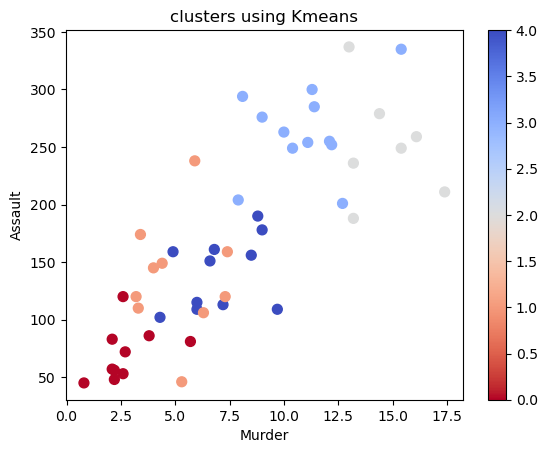

In [47]:
crime1.plot(x='Murder',y='Assault', c=clf.labels_,kind='scatter', s=50,cmap=plt.cm.coolwarm_r)
plt.title('clusters using Kmeans')

In [48]:
WCSS

[13.184122550256445,
 6.596893867946196,
 5.016388924690672,
 3.683456153585914,
 3.199918208562338,
 2.8653579551726813,
 2.6372623787246785,
 2.292543937191576,
 2.0830799400392146,
 1.868283368331009]

In [53]:
clf=KMeans(n_clusters=6)
y_Kmeans=clf.fit_predict(df_norm)

In [54]:
y_Kmeans
clf.labels_

array([3, 5, 1, 2, 5, 5, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 5,
       4, 3, 2, 2, 2, 5, 4, 0, 1, 1, 3, 4, 0, 2, 2, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [55]:
clf.inertia_

2.8331465434360945

In [56]:
md=pd.Series(y_Kmeans) #converting numpy array into column 
df_norm['clust']=md #creating new column 
df_norm

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,5
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,2
4,0.493976,0.791096,1.000000,0.860465,5
5,0.427711,0.544521,0.779661,0.811370,5
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [57]:
df_norm.iloc[:,:].groupby(df_norm.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,0.256024,0.314041,0.801695,0.265891
1,0.643718,0.784247,0.779661,0.543743
2,0.377875,0.326276,0.499230,0.331689
3,0.835628,0.706458,0.377724,0.371724
4,0.113253,0.085959,0.322034,0.093282
5,0.568675,0.702055,0.718644,0.870284


Text(0.5, 1.0, 'clusters using Kmeans')

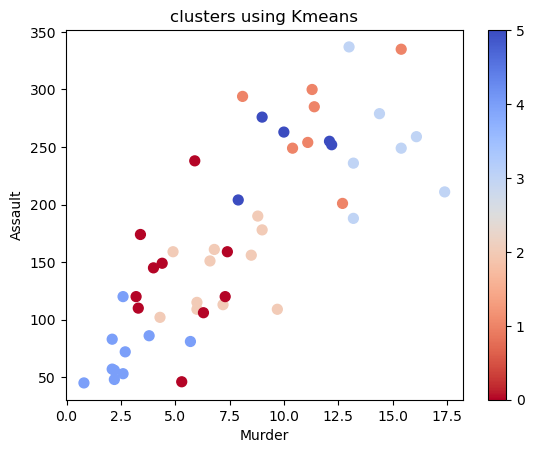

In [58]:
crime1.plot(x='Murder',y='Assault', c=clf.labels_,kind='scatter', s=50,cmap=plt.cm.coolwarm_r)
plt.title('clusters using Kmeans')

so let us take K=6

## DBSCAN 

In [59]:
crime2=pd.read_csv('crime_data.csv')


In [60]:
crime2=crime2.drop(['name'], axis=1)

In [61]:
array=crime2.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [64]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [65]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(x)
distance,indices=nbrs.kneighbors(x)

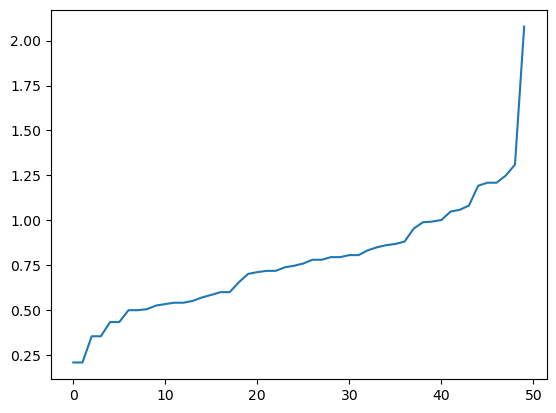

In [66]:
distance=np.sort(distance, axis=0)
distance=distance[:,1]
plt.plot(distance)

In [67]:
dbscan= DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1.1)

In [68]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [70]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [71]:
cl
pd.set_option('display.max_rows', None)

In [72]:
cl

,cluster
0,-1
1,-1
2,-1
3,0
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [73]:
df1=pd.concat([crime2,cl],axis=1)
df1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [74]:
plt.style.use('classic')

Text(0.5, 1.0, 'clustering using DBSCAN')

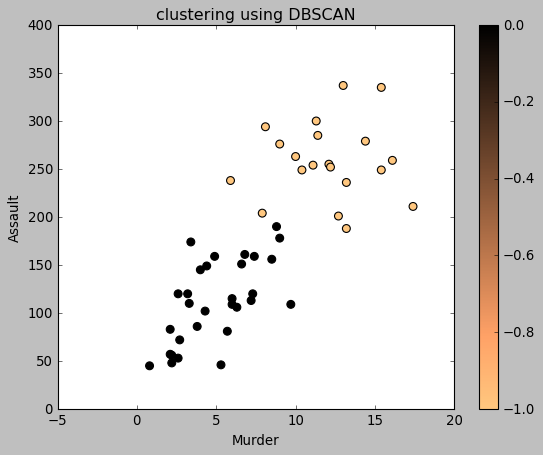

In [76]:
df1.plot(x='Murder', y='Assault', c=dbscan.labels_, kind='scatter', s=50,cmap=plt.cm.copper_r)
plt.title('clustering using DBSCAN')

In [77]:
dl= dbscan.labels_

In [79]:
import sklearn
sklearn.metrics.silhouette_score(x,dl)

0.3907373331499921

In [80]:
dbscan= DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1.25)

In [81]:
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [82]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [83]:
cl
pd.set_option('display.max_rows', None)

In [84]:
cl

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [85]:
df1=pd.concat([crime2,cl],axis=1)
df1

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0


Text(0.5, 1.0, 'clustering using DBSCAN')

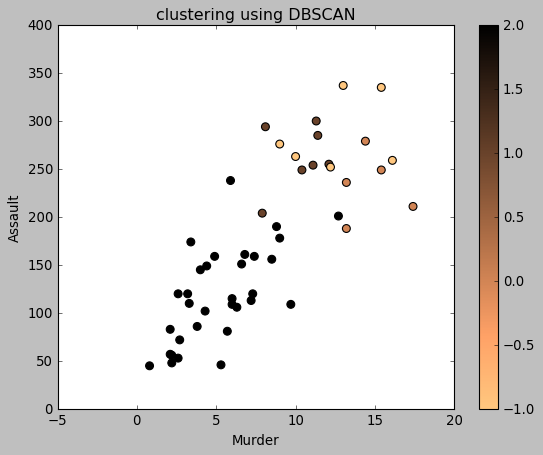

In [86]:
df1.plot(x='Murder', y='Assault', c=dbscan.labels_, kind='scatter', s=50,cmap=plt.cm.copper_r)
plt.title('clustering using DBSCAN')

In [87]:
dl=dbscan.labels_

In [88]:
sklearn.metrics.silhouette_score(x,dl)

0.23869670053300915

Hence we accept eps=1.1, min_points=5